We have learned a Boltzmann distribution gives the probability distribution of a system at temperature T in a certain state. It can be written as: $$ f(E) = \frac{e^{-E/kT}}{Z} $$
where E is the energy of the state, k is the Boltzmann constant and Z is the normalization constant, i.e., the partition function. In this assignment, you will play with this distribution. We will use electron-volts as the units of energy, and note that room temperature corresponds to $0.0257$ eV, i.e., k $\times$ 298K/(1.6 $\times 10^{-19}$J/eV) = 0.0257 eV.

1. Plot $e^{-E/kT}$ as a function of E for T = 300, 500, or 1000K, where E varies from 0 to 1 eV. 

2. Since $f(E)$ is a probability distribution, $$ \int_{0}^{\infty} f{E}dE = 1 \Rightarrow \frac{\int_{0}^{\infty}e^{-E/kT}dE}{Z} = 1 \Rightarrow Z = \int^{\infty}_{0} e^{-E/kT}dE $$
numerically calculate $\int^{\infty}_{0} e^{-E/kT}dE$ to find $Z$ for each temperature. Plot $f(E)$ as a function of $E$ for each temperature. Again, $E$ varies from 0 to 1 eV.

3. Numerically calucalte the average and variance of each distribution you obtain from the previous step and compare with the analytical results. 

4. Numerically find the cumulative distribution function $F(E) = \int^{E}_{0}f(E')dE'$, which gives the probability of finding the system in a state with energy smaller than $E$. Plot the cumulative distribution function vs $E$. Use the results to find the energy where the probabilities of finding the system with an energy below or above are equal. 

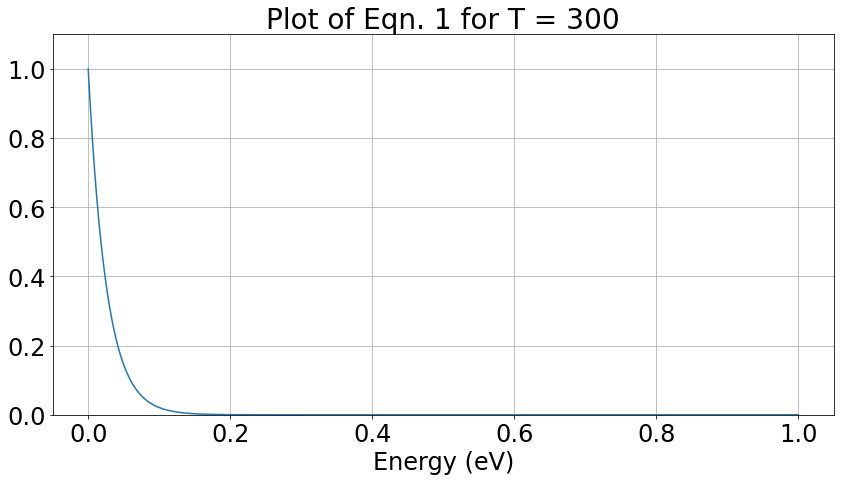

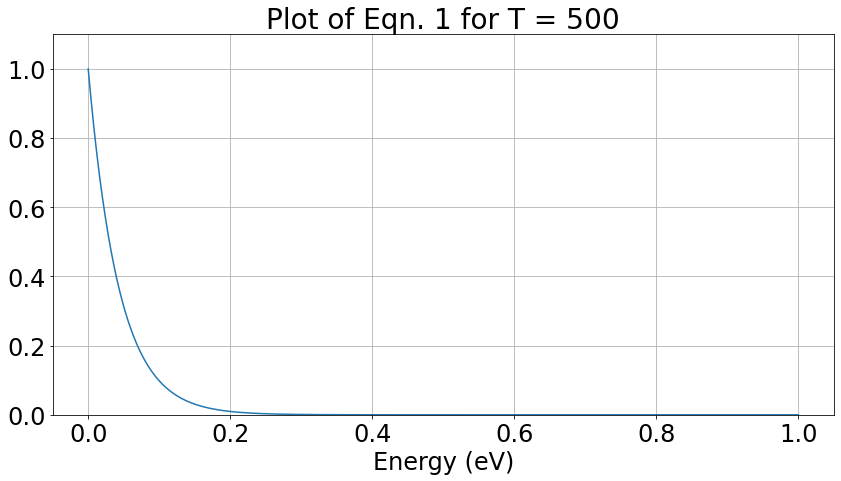

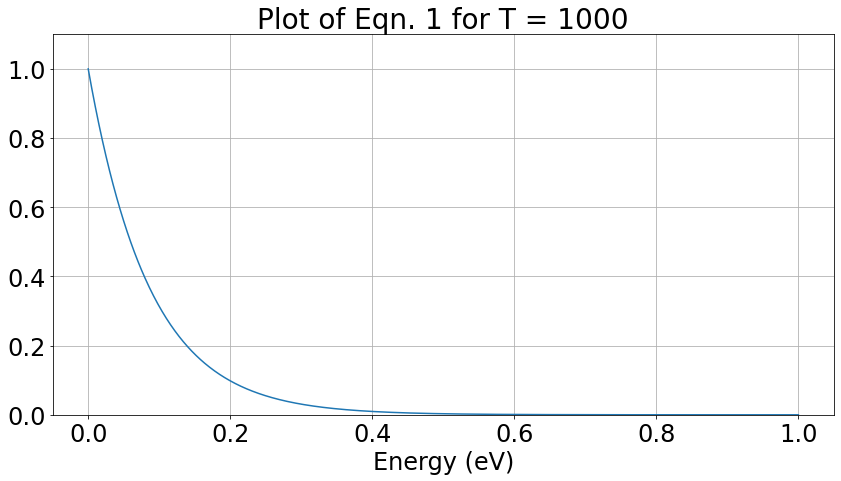

In [2]:
### Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#### Define E, k, T
Temp = np.array([300, 500, 1000]) # Temperature arrays in K
k = 8.617e-5 # Boltzmann constant in eV
E = np.linspace(0, 1, 1001) # Energy in eV


#### Plot the eqn
for T in Temp:
    infunc = np.exp(-E / (k*T)) # func to plot
    plt.figure(figsize=(14, 7))
    plt.rcParams.update({'font.size':24})
    plt.plot(E, infunc)
    plt.ylim(0,1.1)
    plt.xlabel('Energy (eV)')
    #plt.vlines(0.5, 0, 1.1, color ='r', linestyle = '--')
    plt.title('Plot of Eqn. 1 for T = {}'.format(T), fontsize = 28)
    fname = ('FirstEqN{}'.format(T) + '.pdf')
    plt.grid(True)
    plt.savefig(fname)
    plt.show()


In [3]:
#### Find that whole Z thing
def integrand(E, k, T):
    return np.exp(-E / (k*T))
Zlist = []
#### Integrate 
for T in Temp:
    I = quad(integrand, 0, np.inf, args=(k, T))
    Zlist.append(I[0])
Zarr = np.asarray(Zlist)
print(Zarr)

[0.025851 0.043085 0.08617 ]


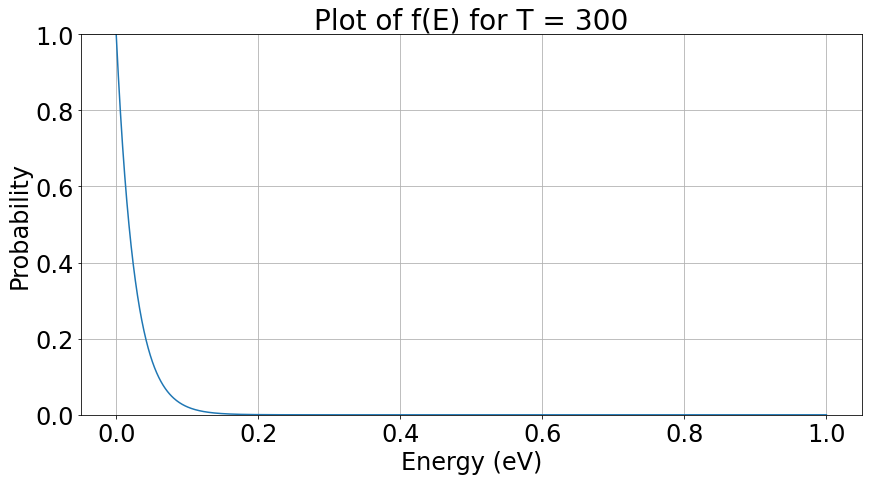

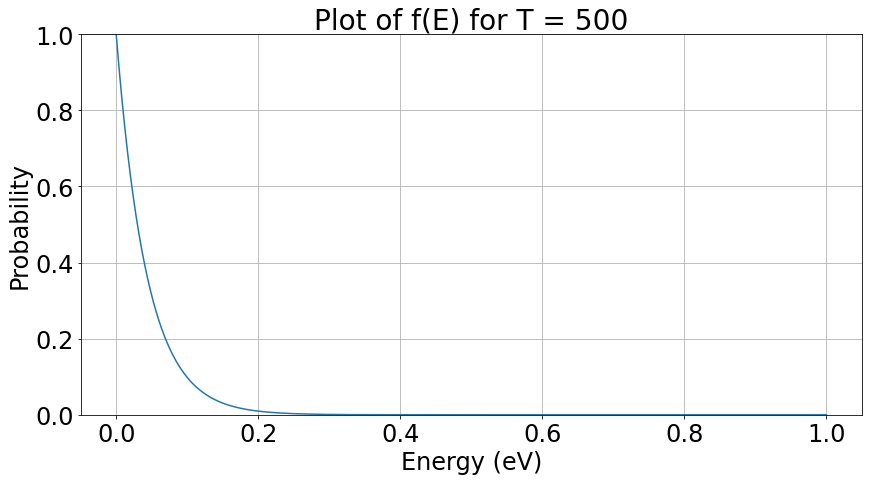

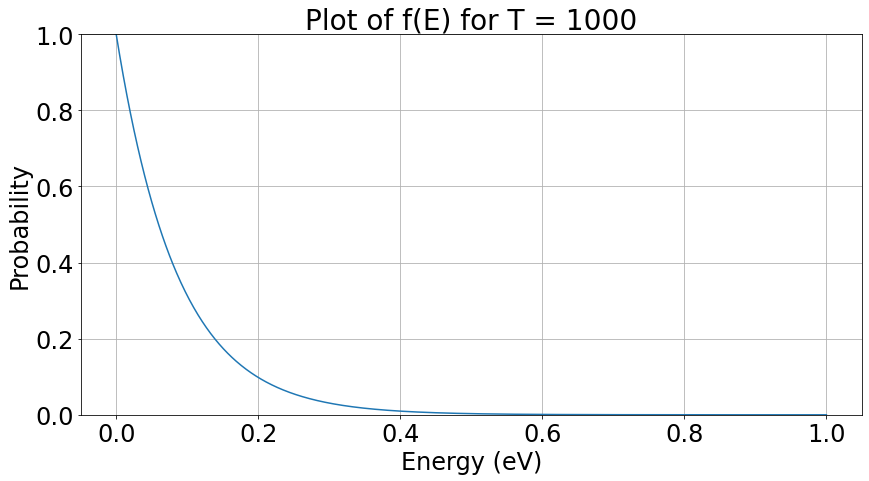

In [4]:
#### NOW IT'S TIME TO GET F U N K Y, plot f(E) as a function of E
i = 0 
for T in Temp:
    fE = (np.exp(-E / (k*T))) / Zarr[i]
    fE = fE/fE[0]
    plt.figure(figsize=(14, 7))
    plt.rcParams.update({'font.size':24})
    plt.plot(E, fE)
    plt.ylim(0,1)
    plt.xlabel('Energy (eV)')
    plt.ylabel('Probability')
    #plt.vlines(0.5, 0, 1.1, color ='r', linestyle = '--')
    plt.title('Plot of f(E) for T = {}'.format(T), fontsize = 28)
    fname = ('fE{}'.format(T) + '.pdf')
    plt.grid(True)
    plt.savefig(fname)
    plt.show()
    i += 1 


In [6]:
### Problem 3, mean and variance of each distribution
i = 0
varlist = []
meanlist = []
anlsdlist = []
Sqmelist = []
Emsqlist = []
for T in Temp:
    fE = (np.exp(-E / (k*T))) / Zarr[i]
    fE = fE
    prebar = (fE * E)
    psq = (prebar**2)
    Ebar = np.sum(prebar)**2
    Esqb = np.sum(psq)
    foo = Ebar - Esqb 
    foort = np.sqrt(foo)
    variance = np.var(prebar)
    standarddev = np.sqrt(variance)
    print(variance, standarddev)

0.00578951939922916 0.07608889143120144
0.024744570786830532 0.15730407110698227
0.156804432115351 0.39598539381566966


0.018000000000000002


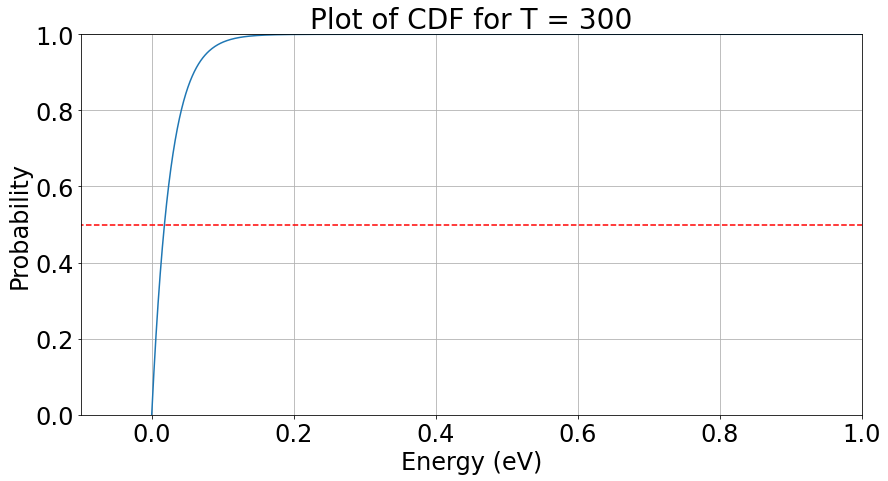

0.03


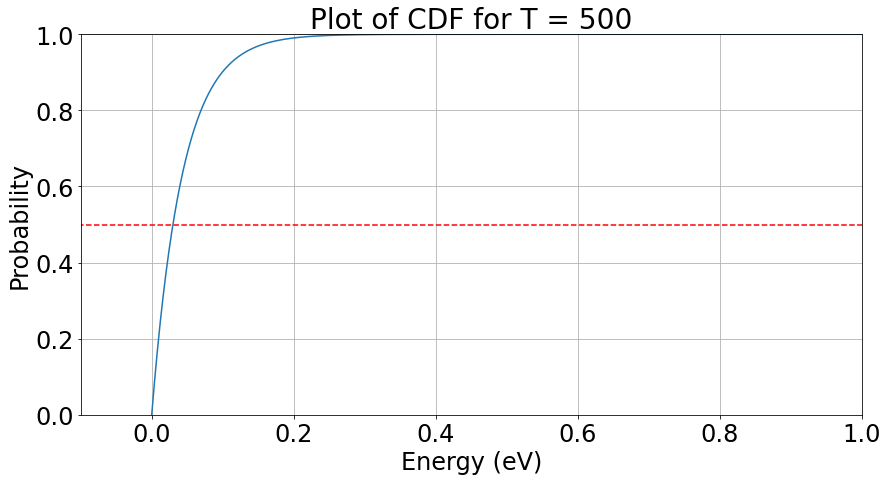

0.06


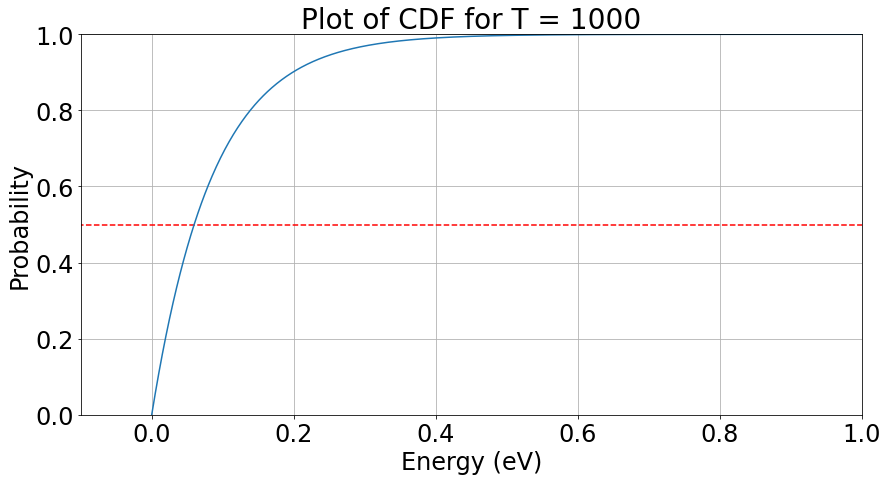

In [89]:
i = 0
for T in Temp:
    plsworklist = []
    def integrand2(E, k, T):
        return np.exp(-E / (k*T)) / Zarr[i]
    for ener in E:    
        Io = quad(integrand2, 0, ener, args=(k, T))
        Ier  = Io[0]
        plsworklist.append(Ier)
    
    tarr = np.asarray(plsworklist)
    dist = tarr - 0.5
    dist = np.abs(dist)
    idx = np.argmin(dist)
    print(E[idx])
    plt.figure(figsize=(14, 7))
    plt.rcParams.update({'font.size':24})
    plt.plot(E, plsworklist)
    plt.hlines(0.5, -1, 2, color = 'r', linestyle = '--')
    plt.ylim(0,1)
    plt.xlim(-0.1, 1)
    plt.xlabel('Energy (eV)')
    plt.ylabel('Probability')
    #plt.vlines(0.5, 0, 1.1, color ='r', linestyle = '--')
    plt.title('Plot of CDF for T = {}'.format(T), fontsize = 28)
    fname = ('cdf{}'.format(T) + '.pdf')
    plt.grid(True)
    plt.savefig(fname)
    plt.show()
    i += 1